In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


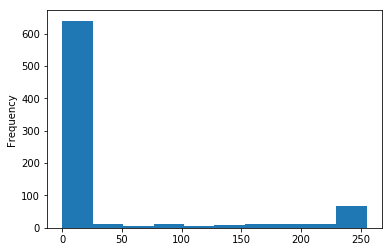

In [7]:
df_train.iloc[0, :].plot.hist()

In [10]:
pd.Series(df_train.values.flatten()).describe()

count    4.710000e+07
mean     3.328165e+01
std      7.852425e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550000e+02
dtype: float64

In [11]:
df_train.shape

(60000, 785)

In [12]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y_train = df_train.iloc[:, 0].values
X_train = df_train.iloc[:, 1:].values/255

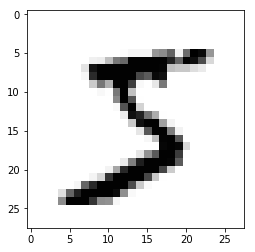

In [28]:
plt.imshow( X_train[0, :].reshape(28, 28), cmap="Greys", interpolation="nearest")

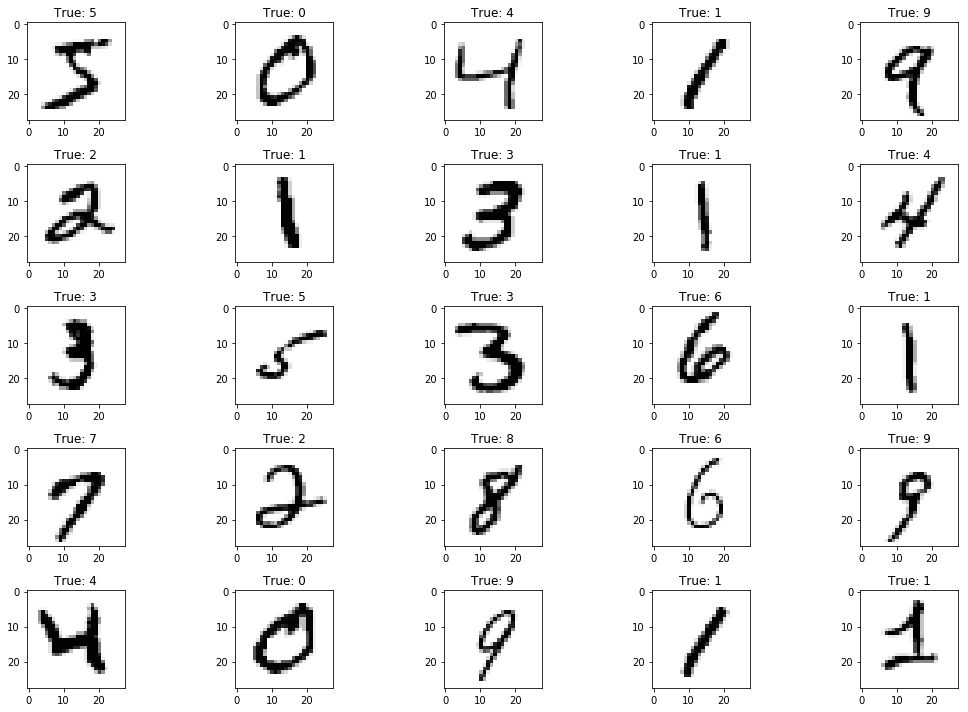

In [33]:
fig, _ = plt.subplots(5, 5, figsize = (15, 10))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i, :].reshape(28, 28), cmap="Greys", interpolation="nearest")
    ax.set_title("True: " + str(y_train[i]))

plt.tight_layout()

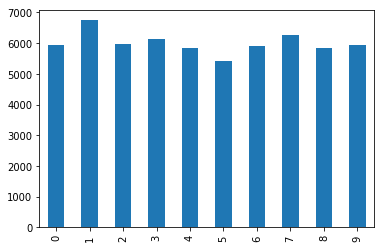

In [36]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

In [38]:
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)
y_test = df_test.iloc[:, 0].values
X_test = df_test.iloc[:, 1:].values/255

In [40]:
from sklearn.linear_model import LogisticRegression

In [42]:
%%time
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.92020000000000002

In [43]:
y_test_pred = lr.predict(X_test)

In [44]:
test_match = y_test == y_test_pred 

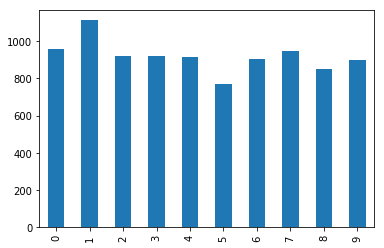

In [46]:
pd.Series(y_test[test_match]).value_counts().sort_index().plot.bar()

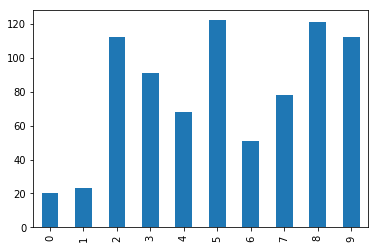

In [47]:
pd.Series(y_test[~test_match]).value_counts().sort_index().plot.bar()

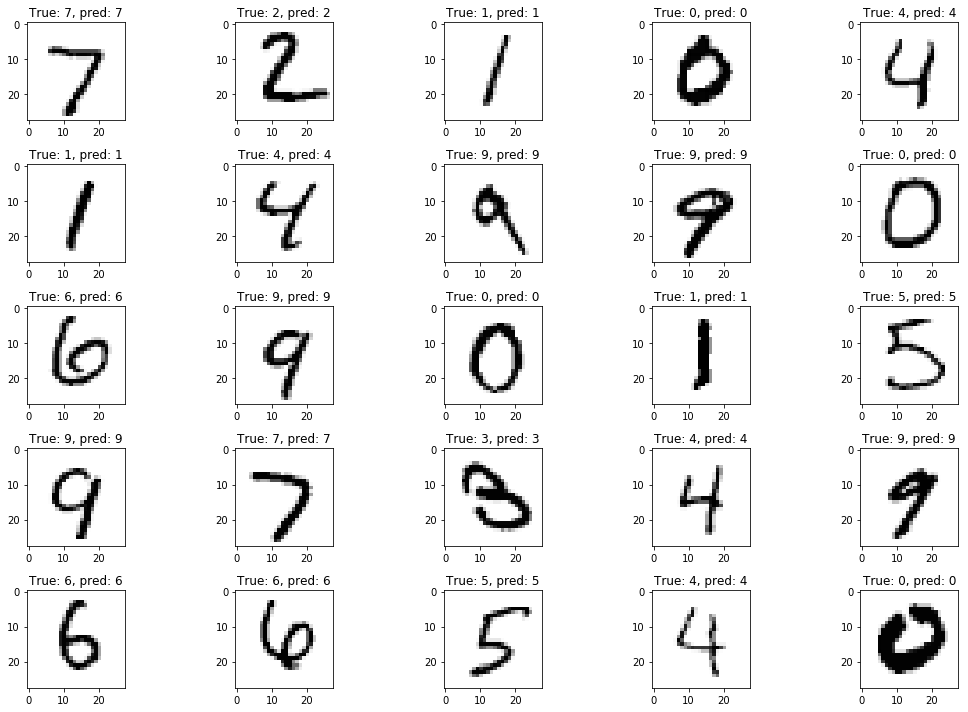

In [50]:
fig, _ = plt.subplots(5, 5, figsize = (15, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[test_match][i, :].reshape(28, 28), cmap="Greys", interpolation="nearest")
    ax.set_title("True: %d, pred: %d" % (y_test[test_match][i], y_test_pred[test_match][i]))
    
plt.tight_layout()

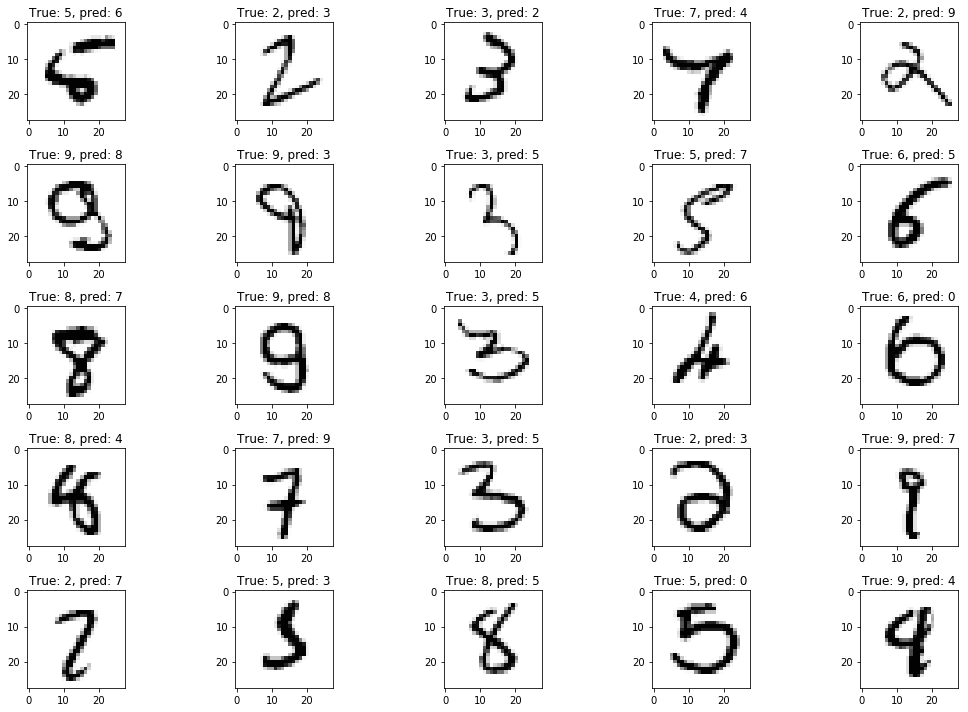

In [49]:
fig, _ = plt.subplots(5, 5, figsize = (15, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[~test_match][i, :].reshape(28, 28), cmap="Greys", interpolation="nearest")
    ax.set_title("True: %d, pred: %d" % (y_test[~test_match][i], y_test_pred[~test_match][i]))
    
plt.tight_layout()